# GA 2.4: Icy Times

<h1 style="position: absolute; display: flex; flex-grow: 0; flex-shrink: 0; flex-direction: row-reverse; top: 60px;right: 30px; margin: 0; border: 0">
    <style>
        .markdown {width:100%; position: relative}
        article { position: relative }
    </style>
    <img src="https://gitlab.tudelft.nl/mude/public/-/raw/main/tu-logo/TU_P1_full-color.png" style="width:100px" />
    <img src="https://gitlab.tudelft.nl/mude/public/-/raw/main/mude-logo/MUDE_Logo-small.png" style="width:100px" />
</h1>
<h2 style="height: 10px">
</h2>

*[CEGM1000 MUDE](http://mude.citg.tudelft.nl/): Week 2.4, Time serie analysis. For: December 6, 2024*

Winter is coming and it is time to start getting our models ready for the ice classic. Our first goal is to improve the temperature model, as that seems to be an important driver of breakup day. Temperature is notoriously hard to predict, but we can analyze historical data to get a better understanding of the patterns. Today we will analyze some time series data from the first 152 days of the year, up to the first of June. We have hourly data available. This is the period of interest for the ice classic, as the ice forms in this period, reaching its maximum thickness around January, and then starts melting, with breakup day typically happening in April or May.

In this assignment we will analyze some time series data. We will first fit a functional model to the data in order to stationarize the data. Then we will fit an AR model to the residuals.

We will start by loading the data and plotting it.

In [1]:
# Importing the required libraries
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from scipy.stats import chi2
from scipy.signal import periodogram

### Task 1: Load the data and plot it
- load the data
- create time vector
- plot the data
- describe the data


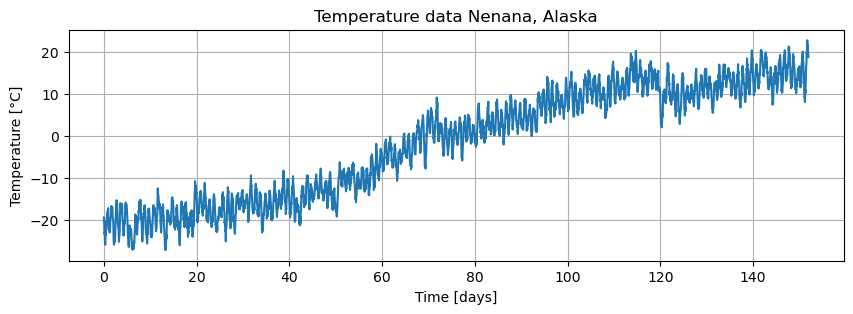

In [2]:
# YOUR_CODE_HERE

# SOLUTION
# Reading the data from the file
data = np.loadtxt('temperature.csv')
time_hours = np.arange(0, len(data))
time_days = time_hours / 24
dt = time_days[1] - time_days[0]
fs = 1 / dt

# Plotting the data
plt.figure(figsize=(10, 3))
plt.plot(time_days, data)
plt.xlabel('Time [days]')
plt.ylabel('Temperature [°C]')
plt.title('Temperature data Nenana, Alaska')
plt.grid(True)
# END SOLUTION BLOCK

## Finding the frequency of the seasonal pattern
We clearly see that the data contains a seasonal pattern. We will start by fitting a functional model to the data in order to stationarize the data. To find the frequency of the seasonal pattern we will use the power spectrum of the data.

We will reuse the function `find_seasonal_pattern` from the workshop.

Remember that for running this function we need to predefine the A-matrix to detrend the data. Since the data only contains the first 5 months of the year, we see that the temperature is increasing over time. Based on what you know of temperature data, what would be the best model to remove the trend? 

### task 1
Provide a A-matrix that removes the trend from the data. There are multiple answers that will work, but some are better than others.
- Provide the A-matrix that you will use to detrend the data.
- Explain why you chose this A-matrix.

In [3]:
def fit_model(data, time, A, plot=False):
    '''
    Function to find the least squares solution of the data
    data: input data
    time: time vector
    A: A-matrix to fit the data
    plot: boolean to plot the results or not
    '''

    # x_hat = YOUR_CODE_HERE # least squares solution
    # y_hat = YOUR_CODE_HERE # model prediction
    # e_hat = YOUR_CODE_HERE # residuals

    # SOLUTION
    x_hat = np.linalg.solve(A.T @ A, A.T @ data)
    y_hat = A @ x_hat
    e_hat = data - y_hat
    # END SOLUTION BLOCK

    if plot:
        plt.figure(figsize=(10, 5))
        plt.subplot(211)
        plt.plot(time, data, label='Data')
        plt.plot(time, y_hat, label='Estimated data')
        plt.xlabel('Time [days]')
        plt.ylabel('Temperature [°C]')
        plt.title('Data vs Estimated data')
        plt.grid(True)
        plt.legend()
        plt.subplot(212)
        plt.plot(time, e_hat, label='Residuals')
        plt.xlabel('Time [days]')
        plt.ylabel('Temperature [°C]')
        plt.title('Residuals')
        plt.grid(True)
        plt.legend()
        plt.tight_layout()

    return x_hat, y_hat, e_hat

def find_frequency(data, time, A, fs, plot=True):
    '''
    Function to find the dominant frequency of the signal
    data: input data
    time: time vector
    A: A-matrix to detrend the data (prior to spectral analysis)
    fs: sampling frequency
    plot: boolean to plot the psd or not
    '''
    # Detrending the data
    _, _, e_hat= fit_model(data, time, A)

    N = len(data)

    # Finding the dominant frequency in e_hat
    # freqs, pxx = periodogram(YOUR_CODE_HERE, fs=YOUR_CODE_HERE, window='boxcar',
    #                          nfft=N, return_onesided=False,
    #                          scaling='density')
    
    # SOLUTION
    # Finding the dominant frequency in e_hat
    freqs, pxx = periodogram(e_hat, fs=fs, window='boxcar',
                                nfft=N, return_onesided=False,
                                scaling='density')
    # END SOLUTION BLOCK

    # finding the dominant frequency and amplitude
    # Note: there are many ways to do this
    # amplitude = YOUR_CODE_HERE # Amplitude of the dominant frequency
    # dominant_frequency = YOUR_CODE_HERE # Dominant frequency

    # SOLUTION
    # finding the dominant frequency and amplitude
    dominant_frequency, amplitude = freqs[np.argmax(pxx)], np.max(pxx)
    # END SOLUTION BLOCK

    # Plotting the PSD
    if plot:
        plt.figure(figsize=(10, 5))
        plt.subplot(211)
        plt.plot(time, e_hat)
        plt.title('Residuals')
        plt.ylabel('Atmospheric Pressure [hPa]')
        plt.grid(True)
        plt.subplot(212)
        plt.plot(freqs[freqs>0], pxx[freqs>0], label='PSD of residuals')
        plt.xlabel('Frequency')
        plt.ylabel('PSD')
        plt.title('Power Spectral Density')
        plt.grid(True)
        plt.plot(dominant_frequency, amplitude, 'ro', label='Dominant Frequency')
        plt.yscale('log')
        plt.xscale('log')
        plt.legend()
        plt.tight_layout()

    return dominant_frequency


### task
- create the A-matrix to detrend
- find the seasonal pattern
- continue till you are happy and have found all the frequencies

Dominant Frequency: 1.00


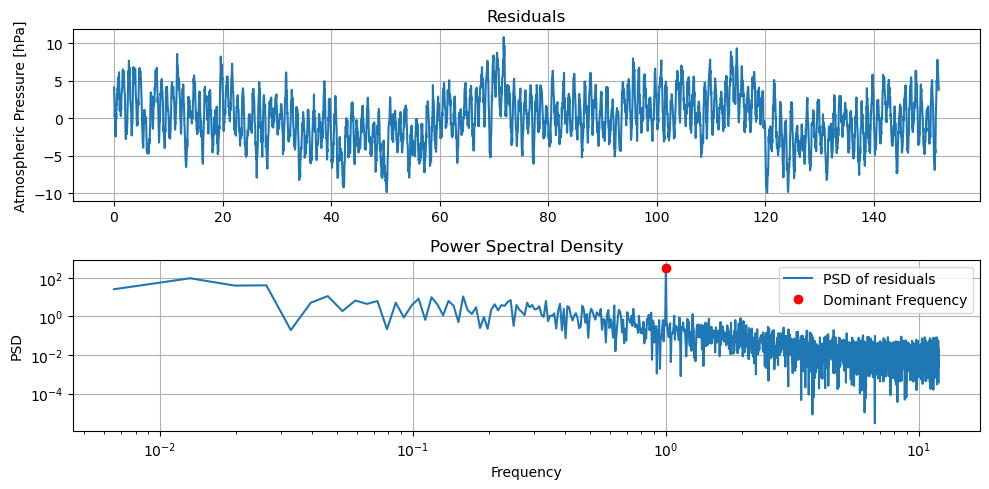

In [4]:
# YOUR_CODE_HERE


# SOLUTION
A = np.column_stack((np.ones(len(data)), np.cos(2*np.pi*time_days/365), np.sin(2*np.pi*time_days/365)))
dom_f = find_frequency(data, time_days, A, fs=fs)
print(f'Dominant Frequency: {dom_f:.2f}')
# END SOLUTION BLOCK

### Task 2
Now that you have found the frequency of the seasonal pattern, We can continue to make our data (more) stationary. Copy the A-matrix you found in the previous task and expand it to include the seasonal pattern. When reporting on seasonal components we want you to report $A_i \cos(2\pi f_i t + \theta_i)$, where $A_i$ is the amplitude, $f_i$ is the frequency and $\theta_i$ is the phase.

## Part 2: Fitting the functional model

In the next cell we will fit the model to generate stationary residuals. Above we have used for each dominant frequency $f_i$ ($i=1,2$) the model:

$$a_i  \cos(2\pi f_i  t) + b_i  \sin(2\pi f_i t)$$ 

However, to report the periodic signals we would like to have the amplitude, phase shift and the frequency of those signals, which can be recovered from:
$$A_i  \cos(2\pi f_i  t + \theta_i)$$
Where the amplitude $A_i = \sqrt{a_i^2 + b_i^2}$ and $\theta_i = \arctan(-b_i/a_i)$

Note: in Section 4.1 book this was shown where the angular frequency $\omega = 2\pi f$ was used.


Estimated Parameters:
x0 = -5.702
x1 = 0.227
x2 = -2.989
x3 = -17.784
x4 = 10.409

The seasonal component is rewritten as:
Ak = 2.998, theta_k = 1.495, f_k = 1.000
Ak = 20.606, theta_k = -2.612, f_k = 0.003


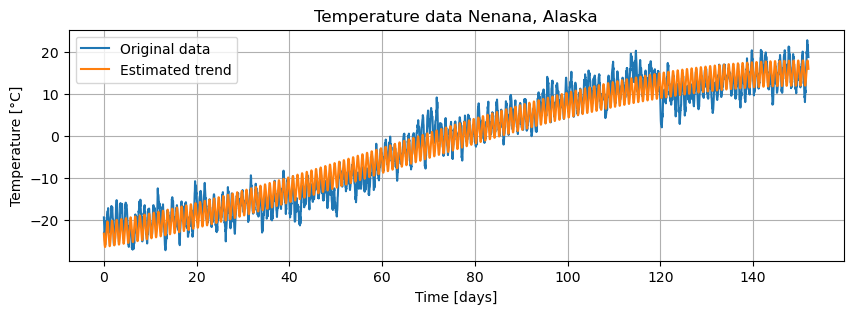

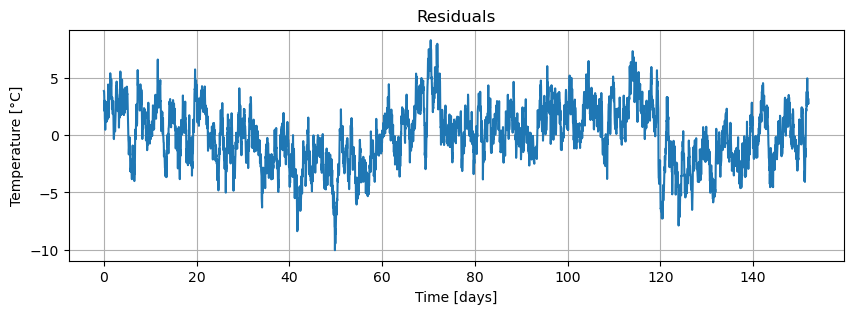

In [ ]:
def rewrite_seasonal_comp(ak, bk):
    '''
    Function to rewrite the seasonal component in terms of sin and cos
    ak: seasonal component coefficient for cos
    bk: seasonal component coefficient for sin
    '''
    # YOUR_CODE_HERE

    # SOLUTION
    Ak = np.sqrt(ak**2 + bk**2)
    theta_k = np.arctan2(-bk, ak)
    return Ak, theta_k
    # END SOLUTION BLOCK

# creating the A matrix of the functional model
# A = YOUR_CODE_HERE
# x_hat, y_hat, e_hat = YOUR_CODE_HERE


# SOLUTION
A = np.column_stack((np.ones(len(data)),
                        np.cos(2*np.pi*1*time_days), np.sin(2*np.pi*1*time_days),
                        np.cos(2*np.pi*time_days/365), np.sin(2*np.pi*time_days/365)))

x_hat, y_hat, e_hat0 = fit_model(data, time_days, A)
# END SOLUTION BLOCK

# Plotting the data and the estimated trend
plt.figure(figsize=(10, 3))
plt.plot(time_days, data, label='Original data')
plt.plot(time_days, y_hat, label='Estimated trend')
plt.xlabel('Time [days]')
plt.ylabel('Temperature [°C]')
plt.title('Temperature data Nenana, Alaska')
plt.grid(True)
plt.legend()

# Plotting the residuals
plt.figure(figsize=(10, 3))
plt.plot(time_days, e_hat0)
plt.xlabel('Time [days]')
plt.ylabel('Temperature [°C]')
plt.title('Residuals')
plt.grid(True)

# Extracting the seasonal component coefficients from the estimated parameters
# a_i = YOUR_CODE_HERE
# b_i = YOUR_CODE_HERE
# freqs = YOUR_CODE_HERE


# SOLUTION
a_i = np.array([x_hat[1], x_hat[3]])
b_i = np.array([x_hat[2], x_hat[4]])
freqs = np.array([1, 1/365])
# END SOLUTION BLOCK

print(f'Estimated Parameters:')
for i in range(len(x_hat)):
    print(f'x{i} = {x_hat[i]:.3f}')

print('\nThe seasonal component is rewritten as:')
for i, j, k in zip(a_i, b_i, freqs):
    Ak, theta_k = rewrite_seasonal_comp(i, j)
    print(f'Ak = {Ak:.3f}, theta_k = {theta_k:.3f}, f_k = {k:.3f}')



# Part 3: Finding the grizzly

When we look at the residuals after removing the periodic pattern(s), we see that there is still a pattern in the data. From researchers in the Nenana area we have heard that there is a grizzly bear that likes to take a nap (hibernate) in the area. We suspect that the grizzly bear has slept too close to the temperature sensor and has influenced the data. 

In the next cell we will write an offset detection algorithm to find the offset in the data. The offset detection algorithm is based on the likelihood ratio test framework. However, due to the presence of autocorrelation in the residuals, the traditional critical values for the likelihood ratio test are not valid. Therefore, we will use a bootstrap approach to estimate the critical values. Luckily, this is not the first time we had to remove a grizzly bear from our data, so we know that the estimated critical values is approximately 100.

## The offset detection algorithm
The offset detection algorithm is based on the likelihood ratio test framework. The likelihood ratio test has a test statistic that is given by:

$$\Lambda = n \log \left( \frac{S_0}{S_1} \right)$$

$$S_i = \sum_{i=1}^n (\hat{e}_i)^2$$

where $S_0$ is the sum of the squared residuals for the model without an offset, $S_1$ is the sum of the squared residuals for the model with an offset, and $n$ is the number of data points. The likelihood ratio test statistic is compared to a critical value to determine if an offset is present in the data.

To find the jump location we will use the following algorithm:
1. Calculate the sum of the squared residuals for the model without an offset, $S_0$.
2. Calculate the sum of the squared residuals for the model with an offset at each data point, $S_1$.
   1. For each data point we will calculate the sum of the squared residuals for the model with an offset at that data point.
   2. The A-matrix for the model with an offset is the same as the A-matrix for the model without an offset, but with an additional column that is 0 till the data point and 1 after the data point.
3. We will find the offset location that maximizes the likelihood ratio test statistic.
4. We will include the offset in the model and repeat the process until the likelihood ratio test statistic is below the critical value.


In [ ]:
def A1_matrix(A0, break_point):
    '''
    Function to create the A1 matrix
    A0: A matrix under H0
    break_point: break point location
    return: A1 matrix
    A
    '''
    # create the new column and stack it to the A0 matrix
    # YOUR_CODE_HERE
    
    # SOLUTION
    new_col = np.zeros(A0.shape[0])
    new_col[break_point:] = 1
    A1 = np.column_stack((A0, new_col))
    # END SOLUTION BLOCK
    return A1


def LR(e0, e1, cv=100, verbose=True):
    '''
    Function to perform the LR test
    e0: residuals under H0
    e1: residuals under H1
    cv: critical value
    '''
    # n = YOUR_CODE_HERE
    # SSR0 = YOUR_CODE_HERE
    # SSR1 = YOUR_CODE_HERE
    # test_stat = YOUR_CODE_HERE
    
    # SOLUTION
    n = len(e0)
    SSR0 = e0.T @ e0
    SSR1 = e1.T @ e1
    test_stat = n*np.log(SSR0 / SSR1)
    # END SOLUTION

    if test_stat > cv:
        if verbose:
            print(f'Test Statistic: {test_stat:.3f} > Critical Value: {cv:.3f}')
            print('Reject the null hypothesis')
    else:
        if verbose:
            print(f'Test Statistic: {test_stat:.3f} < Critical Value: {cv:.3f}')
            print('Fail to reject the null hypothesis')
    return test_stat

def jump_detection(data, time, A, cv=100, plot=True):
    '''
    Function to detect the jump in the data
    data: input data
    time: time vector
    A: A matrix under H0
    cv: critical value
    plot: boolean to plot the results or not
    '''
    # initialize the results vector
    # results = YOUR_CODE_HERE
    # find the residuals under H0
    # YOUR_CODE_HERE

    # SOLUTION
    _, _, e_hat0 = fit_model(data, time, A)
    results = np.zeros(len(data))
    # END SOLUTION BLOCK

    # loop over the data points
    for i in range(1, len(data)):
        # create the A1 matrix
        # A1 = YOUR_CODE_HERE

        # SOLUTION
        A1 = A1_matrix(A, i)
        # END SOLUTION BLOCK

        # We need this statement to avoid singular matrices
        if np.linalg.matrix_rank(A1) < A1.shape[1]:
            pass
        else:
            # find the residuals under H1
            # _, _, e_hat1 = YOUR_CODE_HERE
            # test_stat = YOUR_CODE_HERE
            # results[i] = YOUR_CODE_HERE

            # SOLUTION
            _, _, e_hat1 = fit_model(data, time, A1)
            test_stat = LR(e_hat0, e_hat1, verbose=False)
            results[i] = test_stat
            # END SOLUTION BLOCK

    results = np.array(results)
    # finding the offset location. 
    # Offset is the location where the test statistic is maximum

    # location = YOUR_CODE_HERE
    # value = YOUR_CODE_HERE

    # SOLUTION
    location = np.argmax(results)
    value = results[location]
    # END SOLUTION BLOCK

    if plot:
        plt.figure(figsize=(10, 3))
        plt.plot(time, results)
        plt.plot(time[location], value, 'ro', label='offset')
        plt.plot([0, max(time)], [cv, cv], 'k--', label='Critical Value')
        plt.xlabel('Time [days]')
        plt.ylabel('Test Statistic')
        plt.title('LR Test')
        plt.grid(True)
        plt.legend()

    return location, value


Now we will implement the offset detection algorithm.
run the function `find_offset` to find the offset in the data.
once you have found the offset, include it in the model and repeat the process until the likelihood ratio test statistic is below the critical value.

In [ ]:
# YOUR_CODE_HERE

# SOLUTION
A_offset = A.copy()

while True:
    break_point, test_stat = jump_detection(data, time_days, A_offset)
    print(f'Break Point: {break_point} with : {test_stat:.2f}')
    if test_stat < 100:
        break
    A_offset = A1_matrix(A_offset, break_point) 
# END SOLUTION BLOCK

Estimated Parameters:
x0 = -1.022
x1 = 0.225
x2 = -3.002
x3 = -19.707
x4 = 2.315
x5 = -6.076
x6 = 4.487
The seasonal component is rewritten as:
Ak = 3.011, theta_k = 1.496, f_k = 1.000
Ak = 19.842, theta_k = -3.025, f_k = 0.003


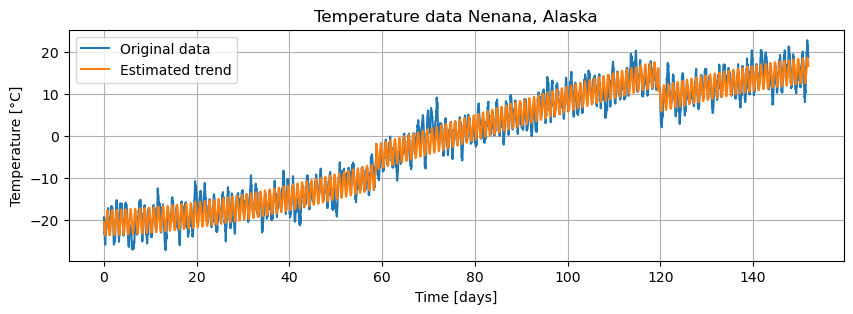

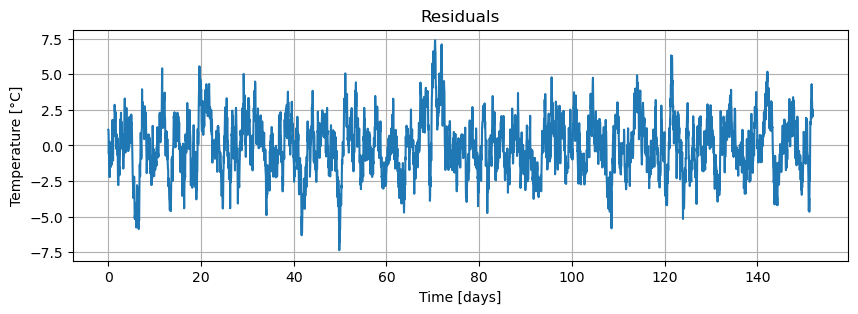

In [ ]:
A2 = A_offset
x_hat, y_hat, e_hat0 = fit_model(data, time_days, A2)

# Plotting the data and the estimated trend
plt.figure(figsize=(10, 3))
plt.plot(time_days, data, label='Original data')
plt.plot(time_days, y_hat, label='Estimated trend')
plt.xlabel('Time [days]')
plt.ylabel('Temperature [°C]')
plt.title('Temperature data Nenana, Alaska')
plt.grid(True)
plt.legend()

# Plotting the residuals
plt.figure(figsize=(10, 3))
plt.plot(time_days, e_hat0)
plt.xlabel('Time [days]')
plt.ylabel('Temperature [°C]')
plt.title('Residuals')
plt.grid(True)

# Extracting the seasonal component coefficients from the estimated parameters
# a_i = YOUR_CODE_HERE
# b_i = YOUR_CODE_HERE
# freqs = YOUR_CODE_HERE

# SOLUTION
a_i = np.array([x_hat[1], x_hat[3]])
b_i = np.array([x_hat[2], x_hat[4]])
freqs = np.array([1, 1/365])
# END SOLUTION BLOCK

print(f'Estimated Parameters:')
for i in range(len(x_hat)):
    print(f'x{i} = {x_hat[i]:.3f}')

print('The seasonal component is rewritten as:')
for i, j, k in zip(a_i, b_i, freqs):
    Ak, theta_k = rewrite_seasonal_comp(i, j)
    print(f'Ak = {Ak:.3f}, theta_k = {theta_k:.3f}, f_k = {k:.3f}')

## Analyzing the residuals
Now that we have our residuals we can fit an AR model to the residuals. We will start by plotting the ACF of the residuals. We will then fit an AR model to the residuals and report the parameters of the AR model. Using the likelihood ratio test framework we will determine the order of the AR model.

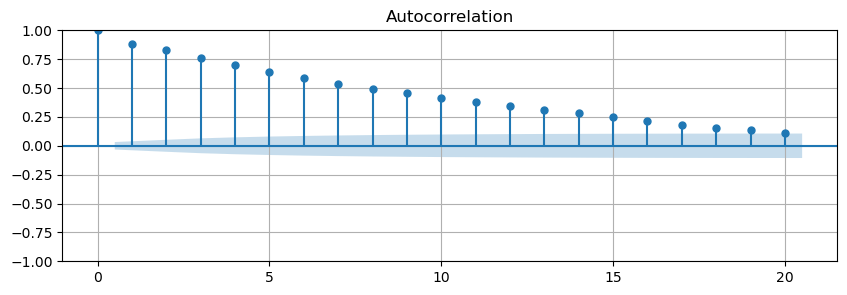

In [ ]:
# Lets start with the ACF plot
fig, ax = plt.subplots(1, 1, figsize=(10, 3))
plot_acf(e_hat0, ax=ax, lags=20);
ax.grid()

Estimated Parameters:
phi = 0.8847


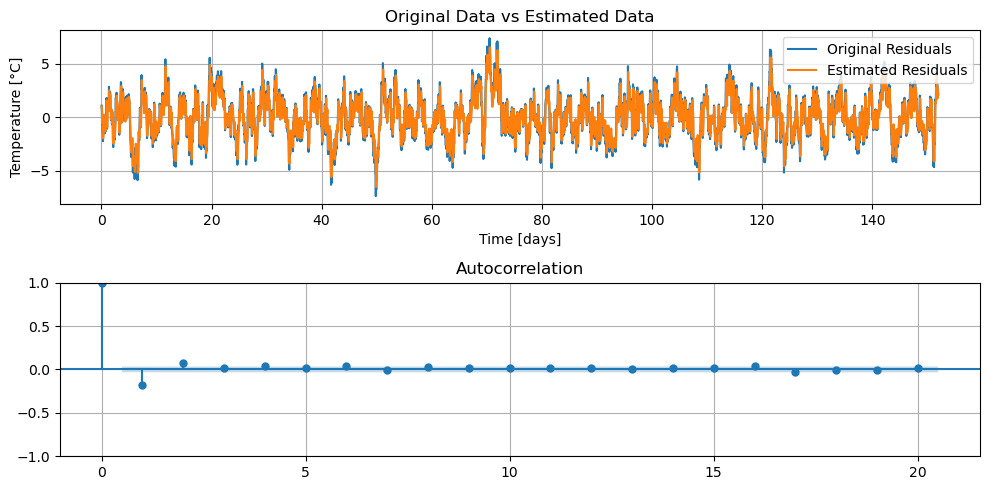

In [ ]:
def AR1(s, time, plot=True):
    '''
    Function to find the AR(1) model of the given data
    s: input data
    return: x_hat, e_hat
    '''
    # y = YOUR_CODE_HERE
    # y_lag_1 = YOUR_CODE_HERE
    # A = np.atleast_2d(y_lag_1).T
    # x_hat, y_hat, e_hat = fit_model(YOUR_CODE_HERE)

    # SOLUTION
    y = s[1:]
    y_lag_1 = s[:-1]
    A = np.atleast_2d(y_lag_1).T
    x_hat, y_hat, e_hat = fit_model(y, time, A)
    # END SOLUTION

    if plot:
        fig, ax = plt.subplots(2, 1, figsize=(10, 5))
        ax[0].plot(time[1:], y, label='Original Residuals')
        ax[0].plot(time[1:], y_hat, label='Estimated Residuals')
        ax[0].set_xlabel('Time [days]')
        ax[0].set_ylabel('Temperature [°C]')
        ax[0].set_title('Original Data vs Estimated Data')
        ax[0].grid(True)
        ax[0].legend()
        plot_acf(e_hat, ax=ax[1], lags=20)
        ax[1].grid()
        fig.tight_layout()
        
    print(f'Estimated Parameters:')
    print(f'phi = {x_hat[0]:.4f}')

    return x_hat, e_hat

# Estimating the AR(1) model
# phi_hat_ar1, e_hat_ar1 = AR1(YOUR_CODE_HERE)

# SOLUTION
phi_hat_ar1, e_hat_ar1 = AR1(e_hat0, time_days)
# END SOLUTION





Estimated Parameters:
phi_1 = 0.7088, phi_2 = 0.1989


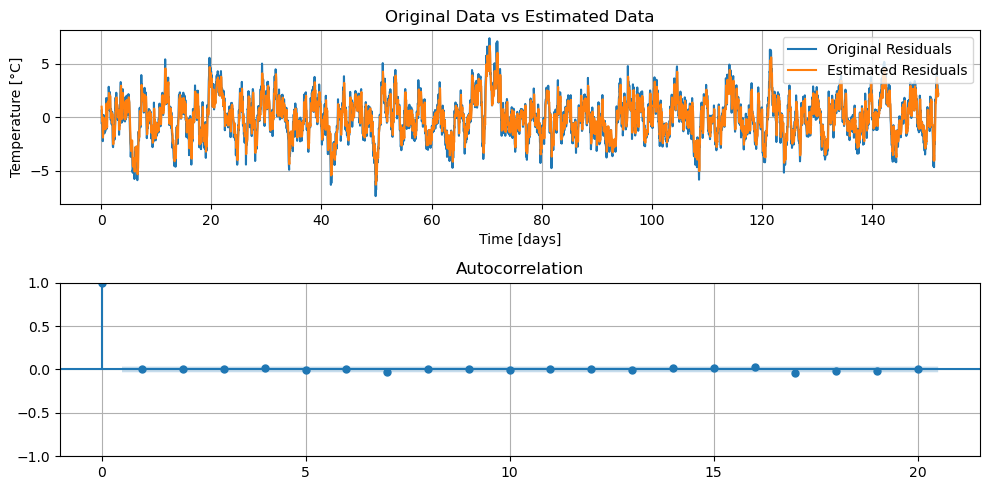

In [ ]:
def AR2(s, time, plot=True):
    '''
    Function to find the AR(2) model of the given data
    s: input data
    return: x_hat, e_hat
    '''
    # y = YOUR_CODE_HERE
    # y_lag_1 = YOUR_CODE_HERE
    # A = YOUR_CODE_HERE
    # x_hat, y_hat, e_hat = fit_model(YOUR_CODE_HERE)

    # SOLUTION
    y = s[2:]
    y_lag_1 = s[1:-1]
    y_lag_2 = s[:-2]
    A = np.column_stack((y_lag_1, y_lag_2))
    x_hat, y_hat, e_hat = fit_model(y, time, A)
    # END SOLUTION

    if plot:
        fig, ax = plt.subplots(2, 1, figsize=(10, 5))
        ax[0].plot(time[2:], y, label='Original Residuals')
        ax[0].plot(time[2:], y_hat, label='Estimated Residuals')
        ax[0].set_xlabel('Time [days]')
        ax[0].set_ylabel('Temperature [°C]')
        ax[0].set_title('Original Data vs Estimated Data')
        ax[0].grid(True)
        ax[0].legend()
        plot_acf(e_hat, ax=ax[1], lags=20)
        ax[1].grid()
        fig.tight_layout()

    print(f'Estimated Parameters:')
    print(f'phi_1 = {x_hat[0]:.4f}, phi_2 = {x_hat[1]:.4f}')

    return x_hat, e_hat

# Estimating the AR(2) model
# phi_hat_ar2, e_hat_ar2 = AR2(YOUR_CODE_HERE)

# SOLUTION
phi_hat_ar2, e_hat_ar2 = AR2(e_hat0, time_days)
# END SOLUTION


## Part 4: Report the results

Now that we have found the periodic signals in the data and fitted an AR model to the residuals, we can report the results. By combining including the AR (noise) process, we get residuals that are white noise. When the model hat white noise residuals, we can also report the confidence intervals of the model.

We will use the unbiased estimate of the variance of the residuals to calculate the confidence intervals. The unbiased estimate of the variance is given by:

$$\hat{\sigma}^2 = \frac{1}{n-p} \sum_{t=1}^{n} \hat{e}_t^2$$

Where $n$ is the number of observations and $p$ is the number of parameters in the model.

The covariance matrix of the parameters is given by:

$$\hat{\Sigma} = \hat{\sigma}^2 (\mathbf{A}^T \mathbf{A})^{-1}$$

Where $\mathbf{A}$ is the design matrix of the model.



<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%"> <p> <b>Task 4.1:</b>   
<p>
Complete the missing parts of the code cell below.
</p>
</div>

Estimated Parameters (standard deviation):
x0 = -1.019		 (0.091)
x1 = 0.225		 (0.021)
x2 = -3.002		 (0.021)
x3 = -19.714		 (0.074)
x4 = 2.323		 (0.095)
x5 = -6.074		 (0.076)
x6 = 4.475		 (0.071)
x7 = 0.709		 (0.016)
x8 = 0.199		 (0.016)

The seasonal component is rewritten as:
A_1 = 3.011, theta_1 = 1.496, f_1 = 1.000
A_2 = 19.851, theta_2 = -3.024, f_2 = 0.003


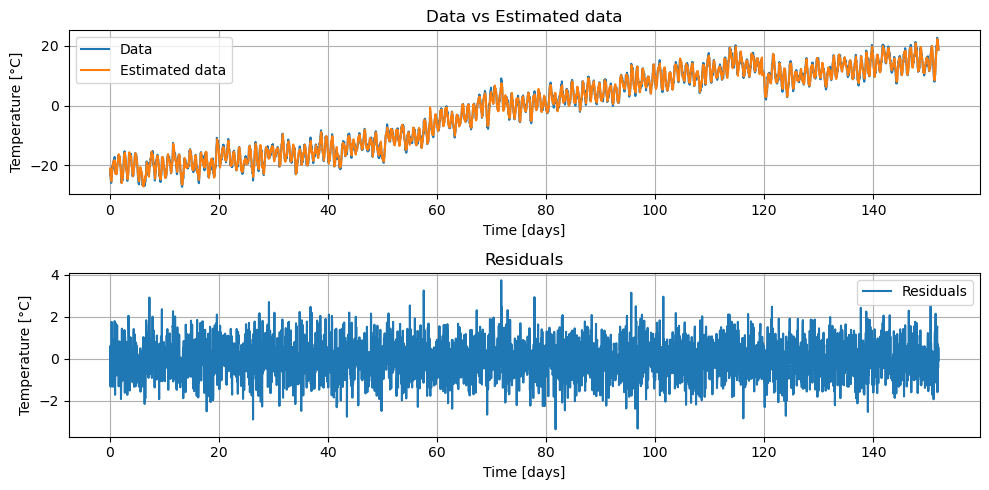

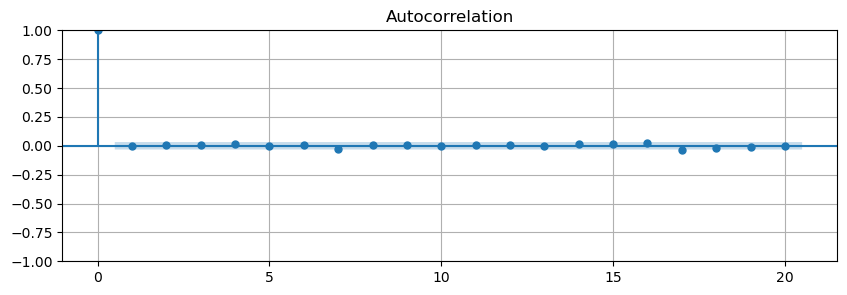

In [ ]:
# combine ar2 and functional model

# A_final = YOUR_CODE_HERE
# x_hat, y_hat, e_hat_final = fit_model(YOUR_CODE_HERE)

# SOLUTION
A_final = np.column_stack((A2[2:], e_hat0[1:-1], e_hat0[:-2]))
x_hat, y_hat, e_hat_final = fit_model(data[2:], time_days[2:], A_final, plot=True)
# END SOLUTION

# Plottint the acf of the residuals

# fig, ax = plt.subplots(1, 1, figsize=(10, 3))
# plot_acf(YOUR_CODE_HERE, ax=ax, lags=20);
# ax.grid()

# SOLUTION
fig, ax = plt.subplots(1, 1, figsize=(10, 3))
plot_acf(e_hat_final, ax=ax, lags=20);
ax.grid()
# END SOLUTION

# # compute the standard errors
# N = YOUR_CODE_HERE
# p = YOUR_CODE_HERE
# sigma2 = YOUR_CODE_HERE
# Cov = YOUR_CODE_HERE
# se = YOUR_CODE_HERE

# # Extracting the seasonal component coefficients from the estimated parameters
# a_i = YOUR_CODE_HERE
# b_i = YOUR_CODE_HERE
# freqs = YOUR_CODE_HERE

# SOLUTION
# compute the standard errors
N = A_final.shape[0]
p = A_final.shape[1]
sigma2 = np.sum(e_hat_final**2) / (N - p)
Cov = sigma2 * np.linalg.inv(A_final.T @ A_final)
se = np.sqrt(np.diag(Cov))

# Extracting the seasonal component coefficients from the estimated parameters
a_i = np.array([x_hat[1], x_hat[3]])
b_i = np.array([x_hat[2], x_hat[4]])
freqs = np.array([1, 1/365])
# END SOLUTION

# Check if the number of coefficients match the number of frequencies
assert len(a_i) == len(b_i) == len(freqs), 'The number of coefficients do not match'

print(f'Estimated Parameters (standard deviation):')
for i in range(len(x_hat)):
    print(f'x{i} = {x_hat[i]:.3f}\t\t ({se[i]:.3f})')

print('\nThe seasonal component is rewritten as:')
i = 0
for a, b, f in zip(a_i, b_i, freqs):
    A_i, theta_i = rewrite_seasonal_comp(a, b)
    i = i + 1
    print(f'A_{i} = {A_i:.3f}, theta_{i} = {theta_i:.3f}, f_{i} = {f:.3f}')


*End of the assignment.*